<a href="https://colab.research.google.com/github/biraj21/deep_learning_with_tf/blob/main/ch4/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing

In [2]:
# loading data.

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (404, 13)
y_train: (404,)
x_test: (102, 13)
y_test: (102,)


In [3]:
# standardizing data

mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train -= mean
x_train /= std

x_test -= mean
x_test /= std

In [4]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])

    model.compile(
        optimizer="rmsprop",
        loss="mse",
        metrics=["mae"]
    )

    return model

## k-fold cross-validation

In [5]:
k = 4
num_val_samples = len(x_train) // k  # kind of like number of samples per partition
num_epochs = 400
val_mae_histories = []  # validation MAE history per fold

for i in range(k):
    print("Processing fold", i)

    val_partition_start = i * num_val_samples
    val_partition_end =  (i + 1) * num_val_samples

    x_val = x_train[val_partition_start: val_partition_end]
    y_val = y_train[val_partition_start: val_partition_end]

    partial_x_train = np.concatenate(
        (x_train[:val_partition_start], x_train[val_partition_end:])
    )
    partial_y_train = np.concatenate(
        (y_train[:val_partition_start], y_train[val_partition_end:])
    )

    model = build_model()
    history = model.fit(
        partial_x_train,
        partial_y_train,
        validation_data=(x_val, y_val),
        epochs=num_epochs,
        batch_size=16,
        verbose=0
    )

    val_mae_histories.append(history.history["val_mae"])

Processing fold 0
Processing fold 1
Processing fold 2
Processing fold 3


In [6]:
average_mae_history = np.mean(np.array(val_mae_histories), axis=0)

Text(0, 0.5, 'Validation MAE')

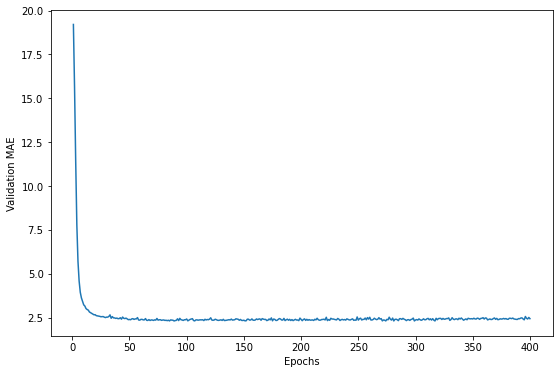

In [7]:
plt.figure(figsize=(9, 6))
plt.plot(range(1, num_epochs + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")

Text(0, 0.5, 'Validation MAE')

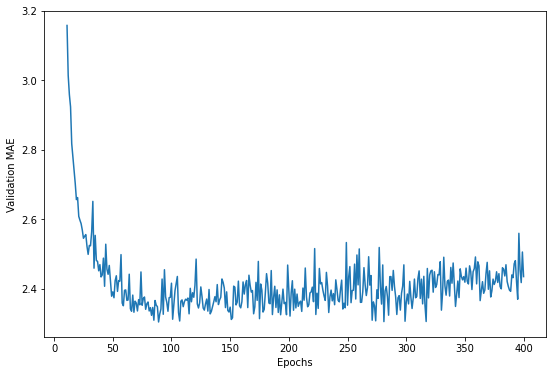

In [8]:
plt.figure(figsize=(9, 6))
plt.plot(range(11, num_epochs + 1), average_mae_history[10:])
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")

In [9]:
average_mae_history.argmin()

88

Text(0, 0.5, 'Validation MAE')

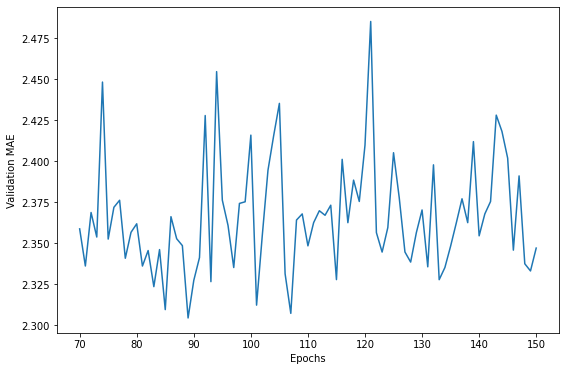

In [10]:
plt.figure(figsize=(9, 6))
plt.plot(range(70, 151), average_mae_history[69:150])
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")

## Final Training

In [11]:
model = build_model()
model.fit(
    x_train,
    y_train,
    epochs=115,
    batch_size=16,
    verbose=0
)

test_loss, test_mae = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 15.4040 - mae: 2.5757


In [12]:
predictions = model.predict(x_test)
print(predictions.shape)

(102, 1)


In [13]:
for i in range(15):
    print(f"{i + 1:2d}) Actual price: {y_test[i]:5.2f}, Predicted price: {predictions[i, 0]:5.2f}")

 1) Actual price:  7.20, Predicted price:  8.80
 2) Actual price: 18.80, Predicted price: 18.70
 3) Actual price: 19.00, Predicted price: 21.60
 4) Actual price: 27.00, Predicted price: 37.03
 5) Actual price: 22.20, Predicted price: 24.86
 6) Actual price: 24.50, Predicted price: 21.92
 7) Actual price: 31.20, Predicted price: 27.40
 8) Actual price: 22.90, Predicted price: 21.60
 9) Actual price: 20.50, Predicted price: 18.81
10) Actual price: 23.20, Predicted price: 22.98
11) Actual price: 18.60, Predicted price: 19.22
12) Actual price: 14.50, Predicted price: 16.92
13) Actual price: 17.80, Predicted price: 15.79
14) Actual price: 50.00, Predicted price: 42.46
15) Actual price: 20.80, Predicted price: 21.29
